In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# XOR inputs
x_inputs = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
# XOR outputs
y_outputs = np.array([0, 1, 1, 0])
# Number of inputs
n_x = 2
# Number of neurons in the output layer
n_y = 1
# Number of neurons in the hidden layer
n_h = 2
# Total training examples
m = x_inputs.shape[1]
# Specify the learning rate
learningRate = 0.1
# Define random seed for consistent results
np.random.seed(2)
# Define weight matrices for neural network
w1 = np.random.rand(n_h, n_x) # Weight matrix for the hidden layer
w2 = np.random.rand(n_y, n_h) # Weight matrix for the output layer
# Define a list to accumulate losses
losses = []


In [ ]:
# use sigmoid activation function for hidden layer and output
def sigmoid(z):
  z = 1/(1+np.exp(-z))
  return z

# Forward propagation
def forward_propagation(w1, w2, x_inputs):
  z1 = np.dot(w1, x_inputs)
  a1 = sigmoid(z1)
  z2 = np.dot(w2, a1)
  a2 = sigmoid(z2)
  return z1, a1, z2, a2

# Backward propagation
def back_propagation(m, w1, w2, z1, a1, z2, a2, y):
  dz2 = a2 - y
  dw2 = np.dot(dz2, a1.T)/m
  dz1 = np.dot(w2.T, dz2) * a1*(1-a1)
  dw1 = np.dot(dz1, x_inputs.T)/m
  dw1 = np.reshape(dw1, w1.shape)
  dw2 = np.reshape(dw2, w2.shape)
  return dz2, dw2, dz1, dw1

Text(0, 0.5, 'Loss value')

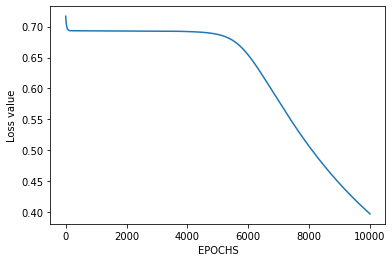

In [ ]:
iterations = 10000
for i in range(iterations):
  z1, a1, z2, a2 = forward_propagation(w1, w2, x_inputs)
  loss = -(1/m)*np.sum(y_outputs*np.log(a2)+(1-y_outputs)*np.log(1-a2))
  losses.append(loss)
  da2, dw2, dz1, dw1 = back_propagation(m, w1, w2, z1, a1, z2, a2, y_outputs)
  w2 = w2 - learningRate*dw2
  w1 = w1 - learningRate*dw1

# Plot lossess to see how the network is doing. 
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [ ]:
test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

For input [1, 0] output is 1
For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 1] output is 0


In [ ]:
def predict(w1, w2, input):
  z1, a1, z2, a2 = forward_propagation(w1, w2, test)
  a2 = np.squeeze(a2)
  if a2 >= 0.5:
    print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
  else:
    print("For input", [i[0] for i in input], "output is 0")

